In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
import seaborn as sns # a visualization library from matplotlib
from math import sin, cos, sqrt, atan2, radians
import json
import pprint
import ast

In [2]:
Course_df = pd.read_excel(r"/Users/artun/Desktop/ens491:burak_kocuk/18-19-fall-course.xlsx") #course list
TA_df =pd.read_excel(r"/Users/artun/Desktop/ens491:burak_kocuk/18-19-fall-ta.xlsx") # TA preference list

In [3]:
course_n_rows, course_n_columns = Course_df.shape  # get the shape of dataframe
print("Shape of course dataframe is")
print("number of rows: {}, number of columns: {}".format(course_n_rows, course_n_columns))

Shape of course dataframe is
number of rows: 120, number of columns: 9


In [4]:
n_rows, n_columns = TA_df.shape  # get the shape of dataframe
print("Shape of TA dataframe is")
print("number of rows: {}, number of columns: {}".format(n_rows, n_columns))

Shape of TA dataframe is
number of rows: 310, number of columns: 11


## Brief preview of both TA and Course preference lists

In [5]:
Course_df.head()

,CRN,Name,Section,Title,Preferred,Hours Assigned,Hours Requested,Requesting Teaching Grads,Assigned Teaching Grads
0,NaN,NaN,NaN,NaN,Grad Program,NaN,NaN,NaN,NaN
1,11113.0,ADP MATH 101,0,0,MATH,70.0,60.0,NaN,"Momina Rizwan (71380, ME, 20 hours)\nCansu Ozt..."
2,11114.0,ADP MATH 102,0,0,MATH,60.0,60.0,NaN,"Kadriye Kahraman (71154, BIO, 20 hours)\nFasee..."
3,11111.0,ADP NS 101,0,0,PHYS,40.0,30.0,2-Ozum sehnaz Caliskan ( 71378 ) (20 / 20),"Tugdem Muslu (70891, BIO, 10 hours)\nFirat Dik..."
4,11112.0,ADP NS 102,0,0,PHYS,40.0,40.0,2-Ozum sehnaz Caliskan ( 71378 ) (20 / 20),"Sezgi Biyiklioglu (70885, BIO, 10 hours)\nDeni..."


In [6]:
TA_df.head()

,Student ID,Name,Degree,Program,Hours Assigned,Hours Requested,Requested Courses,Assigned Course 1,CRN 1,Assigned Course 2,CRN 2
0,18282,Abdolali \nKhalili Sadaghiani,PHD,ME,20,20,1- MATH 101 (195 / 135)\n2- ENS 204 (70 / 75)\...,ENS 204,11182.0,NaN,NaN
1,24375,Abdul Rahman \nDabbour,MS,ME,20,20,1- MATH 203 (135 / 160)\n2- NS 101 (320 / 54)\...,MATH 203,11033.0,NaN,NaN
2,16440,Abdulkadir \nUzun,MS,EE,10,10,1- EE 409 (10 / 10)\n2- ENS 211 (50 / 80)\n3- ...,EE 409,11009.0,NaN,NaN
3,14277,Abdurrahman \nBurak,PHD,EE,10,10,1- EE 303 (15 / 15)\n2- ENS 203 (45 / 100)\n3-...,EE 303,10225.0,NaN,NaN
4,20205,Adnan \nTaşdemir,PHD,MAT,10,10,NaN,ENS 205,11066.0,NaN,NaN


## Data types for TA & Courses dataframes

In [7]:
Course_df.dtypes

CRN                          float64
Name                          object
Section                       object
Title                         object
Preferred                     object
Hours Assigned               float64
Hours Requested              float64
Requesting Teaching Grads     object
Assigned Teaching Grads       object
dtype: object

In [8]:
TA_df.dtypes

Student ID             int64
Name                  object
Degree                object
Program               object
Hours Assigned         int64
Hours Requested        int64
Requested Courses     object
Assigned Course 1     object
CRN 1                float64
Assigned Course 2     object
CRN 2                float64
dtype: object

## Dealing with Dirty Data 

In [9]:
# TA dataframe first
TA_df = TA_df.fillna(0) # NaN values are cumbersome values. Change all to 0
TA_df['CRN 1'] = TA_df['CRN 1'].astype('int64') # CRN values are actually integer values. However , they are float in the file
# Change the CRN 1 column value type to int as expected
TA_df['CRN 2'] = TA_df['CRN 2'].astype('int64')
#Change the CRN 2 column value type to int as expected
TA_df['Name'] = TA_df['Name'].replace('\n',' ', regex=True)
TA_df['Assigned Course 2'] = TA_df['Assigned Course 2'].replace('\n',' ', regex=True)

In [10]:
TA_df.head(n_rows)

,Student ID,Name,Degree,Program,Hours Assigned,Hours Requested,Requested Courses,Assigned Course 1,CRN 1,Assigned Course 2,CRN 2
0,18282,Abdolali Khalili Sadaghiani,PHD,ME,20,20,1- MATH 101 (195 / 135)\n2- ENS 204 (70 / 75)\...,ENS 204,11182,0,0
1,24375,Abdul Rahman Dabbour,MS,ME,20,20,1- MATH 203 (135 / 160)\n2- NS 101 (320 / 54)\...,MATH 203,11033,0,0
2,16440,Abdulkadir Uzun,MS,EE,10,10,1- EE 409 (10 / 10)\n2- ENS 211 (50 / 80)\n3- ...,EE 409,11009,0,0
3,14277,Abdurrahman Burak,PHD,EE,10,10,1- EE 303 (15 / 15)\n2- ENS 203 (45 / 100)\n3-...,EE 303,10225,0,0
4,20205,Adnan Taşdemir,PHD,MAT,10,10,0,ENS 205,11066,0,0
5,22232,Afrim Bojnik,MS,MATH,20,20,1- MATH 201 (180 / 125)\n2- MATH 201 (10 / 125...,MATH 201,11070,0,0
6,13953,Ahmet Can Mert,PHD,EE,30,30,1- CS 303 (90 / 128)\n2- ENS 203 (45 / 100)\n3...,CS 303,10112,0,0
7,10613,Ahmet Selim Pehlivan,PHD,ME,10,10,1- ENS 209 (150 / 53),ENS 204,11182,0,0
8,18370,Ali Ansari Hamedani,PHD,MAT,20,20,1- MAT 312 (20 / 15)\n2- NS 207 (40 / 35)\n3- ...,MATH 101,10638,0,0
9,25991,Ali Ebadi Torkayesh,MS,IE,20,20,1- ENS 208 (110 / 50)\n2- IE 301 (60 / 60)\n3-...,ENS 208,11067,0,0


In [11]:
# Course dataframes turn
Course_df = Course_df.fillna('0') # replace all NaN values with 0
Course_df = Course_df.drop(Course_df.index[0])
Course_df['CRN'] = Course_df['CRN'].astype('int64')
Course_df['Hours Assigned'] = Course_df['Hours Assigned'].astype('int64')
Course_df['Hours Requested'] = Course_df['Hours Requested'].astype('int64')
Course_df.head()

,CRN,Name,Section,Title,Preferred,Hours Assigned,Hours Requested,Requesting Teaching Grads,Assigned Teaching Grads
1,11113,ADP MATH 101,0,0,MATH,70,60,0,"Momina Rizwan (71380, ME, 20 hours)\nCansu Ozt..."
2,11114,ADP MATH 102,0,0,MATH,60,60,0,"Kadriye Kahraman (71154, BIO, 20 hours)\nFasee..."
3,11111,ADP NS 101,0,0,PHYS,40,30,2-Ozum sehnaz Caliskan ( 71378 ) (20 / 20),"Tugdem Muslu (70891, BIO, 10 hours)\nFirat Dik..."
4,11112,ADP NS 102,0,0,PHYS,40,40,2-Ozum sehnaz Caliskan ( 71378 ) (20 / 20),"Sezgi Biyiklioglu (70885, BIO, 10 hours)\nDeni..."
5,10083,BIO 303,0,Genetics,0,30,20,2-Lolai Ikromzoda ( 71168 ) (10 / 10)\n2-Sofia...,"Lolai Ikromzoda (71168, BIO, 10 hours)\nCem Az..."


## How many TA's requested for each course ?

In [22]:
for courses in range(1,course_n_rows) :
    data_temp = Course_df.at[courses,'Requesting Teaching Grads']
    if  data_temp != "0" :
        data = Course_df.at[courses,'Requesting Teaching Grads'].splitlines()
        print(Course_df.at[courses,'Name'] , "requested" ,len(data),"TA's")

ADP NS 101 requested 1 TA's
ADP NS 102 requested 1 TA's
BIO 303 requested 13 TA's
BIO 306 requested 4 TA's
BIO 321 requested 4 TA's
BIO 332 requested 12 TA's
BIO 363 requested 2 TA's
BIO 415 requested 2 TA's
BIO 445 requested 2 TA's
BIO 452 requested 11 TA's
CHEM 301 requested 6 TA's
CS 100 requested 6 TA's
CS 201 requested 30 TA's
CS 204 requested 15 TA's
CS 300 requested 13 TA's
CS 301 requested 6 TA's
CS 302 requested 3 TA's
CS 303 requested 9 TA's
CS 307 requested 8 TA's
CS 402 requested 1 TA's
CS 404 requested 5 TA's
CS 405 requested 1 TA's
CS 408 requested 10 TA's
CS 409 requested 2 TA's
CS 411 requested 2 TA's
CS 412 requested 4 TA's
CS 439 requested 1 TA's
CS 512 requested 1 TA's
EE 303 requested 5 TA's
EE 307 requested 2 TA's
EE 311 requested 3 TA's
EE 313 requested 2 TA's
EE 401 requested 1 TA's
EE 403 requested 1 TA's
EE 407 requested 2 TA's
EE 409 requested 3 TA's
EE 413 requested 3 TA's
EE 414 requested 1 TA's
EE 417 requested 2 TA's
EE 473 requested 1 TA's
EE 48000 reques

In [24]:
for TA in range(1,course_n_rows) :
    if Course_df.at[TA,'Assigned Teaching Grads'] != "None" :
        data = Course_df.at[TA,'Assigned Teaching Grads'].splitlines()
        print(Course_df.at[TA,'Name'] , "assigned" ,len(data),"TA's")
    else :
        print(Course_df.at[TA,'Name'] , "assigned" , 0,"TA's")

ADP MATH 101 assigned 5 TA's
ADP MATH 102 assigned 4 TA's
ADP NS 101 assigned 3 TA's
ADP NS 102 assigned 3 TA's
BIO 303 assigned 3 TA's
BIO 306 assigned 3 TA's
BIO 321 assigned 1 TA's
BIO 332 assigned 3 TA's
BIO 363 assigned 1 TA's
BIO 415 assigned 1 TA's
BIO 445 assigned 1 TA's
BIO 452 assigned 1 TA's
CHEM 301 assigned 2 TA's
CS 100 assigned 1 TA's
CS 201 assigned 12 TA's
CS 204 assigned 4 TA's
CS 300 assigned 3 TA's
CS 301 assigned 1 TA's
CS 302 assigned 1 TA's
CS 303 assigned 6 TA's
CS 307 assigned 2 TA's
CS 402 assigned 0 TA's
CS 404 assigned 2 TA's
CS 405 assigned 1 TA's
CS 408 assigned 3 TA's
CS 409 assigned 1 TA's
CS 411 assigned 2 TA's
CS 412 assigned 2 TA's
CS 439 assigned 1 TA's
CS 512 assigned 0 TA's
EE 303 assigned 2 TA's
EE 307 assigned 1 TA's
EE 311 assigned 1 TA's
EE 313 assigned 2 TA's
EE 401 assigned 1 TA's
EE 403 assigned 0 TA's
EE 407 assigned 1 TA's
EE 409 assigned 1 TA's
EE 413 assigned 0 TA's
EE 414 assigned 1 TA's
EE 417 assigned 2 TA's
EE 473 assigned 1 TA's
EE 

## Number of Ta's for each program

In [25]:
top_programs = TA_df['Program'].value_counts()
print(top_programs)

MAT      53
ME       48
BIO      43
CS       40
IE       32
MFE      28
EE       27
MATH     20
PHYS     15
CYSEC     3
ETM       1
Name: Program, dtype: int64


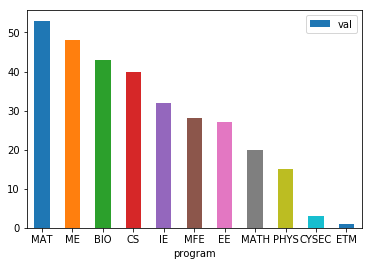

In [28]:
df = pd.DataFrame({'program':['MAT', 'ME', 'BIO','CS','IE','MFE','EE','MATH','PHYS','CYSEC','ETM'], 'val':[53, 48, 43,40,32,28,27,20,15,3,1]})
ax = df.plot.bar(x='program', y='val', rot=0)